In [34]:
from scipy import stats

## Task 1
Существуют две версии одновыборочного Z-критерия для доли, отличающихся формулами для статистики. Одна из этих версий более точная, поэтому мы говорили только о ней, а вторую не обсуждали вообще. Какую из этих двух версий одновыборочных Z-критериев для доли мы проходили?

## Answer

* (+) Версия множителей Лагранжа со статистикой $Z=\frac{\hat{p}-p_0}{\sqrt{\frac{p_0\left(1-p_0\right)}{n}}}$
* (-) Версия Вальда со статистикой $Z=\frac{\hat{p}-p_0}{\sqrt{\frac{\hat{p}\left(1-\hat{p}\right)}{n}}}$

## Task 2
Z-критерий для двух долей в связанных выборках использует только информацию о:

## Answer
* (+) количестве несовпадающих пар значений признаков — (0,1)(0,1) и (1,0)(1,0), и объёме выборок n
* (-) количестве несовпадающих пар значений признаков — (0,1)(0,1) и (1,0)(1,0), и порядке их появления
* (-) количестве единиц в каждой из выборок и их объёме nn
* (-) количестве совпадающих пар значений признаков — (0,0)(0,0) и (1,1)(1,1), и объёме выборок n

## Task 3
В одном из выпусков программы "Разрушители легенд" проверялось, действительно ли заразительна зевота. В эксперименте участвовало 50 испытуемых, проходивших собеседование на программу. Каждый из них разговаривал с рекрутером; в конце 34 из 50 бесед рекрутер зевал. Затем испытуемых просили подождать решения рекрутера в соседней пустой комнате.

Во время ожидания 10 из 34 испытуемых экспериментальной группы и 4 из 16 испытуемых контрольной начали зевать. Таким образом, разница в доле зевающих людей в этих двух группах составила примерно 4.4%. Ведущие заключили, что миф о заразительности зевоты подтверждён.

Можно ли утверждать, что доли зевающих в контрольной и экспериментальной группах отличаются статистически значимо? Посчитайте достигаемый уровень значимости при альтернативе заразительности зевоты, округлите до четырёх знаков после десятичной точки.

## Answer
Statistic: $Z=\frac{\hat{p}_1−\hat{p}_2}{\sqrt{P(1-P)(\frac{1}{n_1}+\frac{1}{n_2})}}, P=\frac{\hat{p}_1 n_1−\hat{p}_2 n_2}{n_1+n_2}$<br/>
p1 - experimental group<br/>
p2 - test group

In [173]:
import numpy as np

p1 = 10 / 34
n1 = 34.
p2 = 4 / 16
n2 = 16.

p = (p1*n1 - p2*n2) / (n1 + n2)
stat = (p1 - p2) / np.sqrt(p*(1-p)*(1/n1 + 1/n2))
print(stat)

0.4478110755198992


## Answer

In [174]:
print('{:.4f}'.format((1 - stats.norm.cdf(stat))))

0.3271


## Task 4
Имеются данные измерений двухсот швейцарских тысячефранковых банкнот, бывших в обращении в первой половине XX века. Сто из банкнот были настоящими, и сто — поддельными. На рисунке ниже показаны измеренные признаки:
<img src="back_horizontal.jpg">
Загрузите данные:<br/><br/>
**banknotes.txt<br/><br/>**
Отделите 50 случайных наблюдений в тестовую выборку с помощью функции sklearn.cross_validation.train_test_split (зафиксируйте random state = 1). На оставшихся 150 настройте два классификатора поддельности банкнот:

логистическая регрессия по признакам $X_1,X_2,X_3$<br/>
логистическая регрессия по признакам $X_4,X_5,X_6$<br/>
Каждым из классификаторов сделайте предсказания меток классов на тестовой выборке. Одинаковы ли доли ошибочных предсказаний двух классификаторов? Проверьте гипотезу, вычислите достигаемый уровень значимости. Введите номер первой значащей цифры (например, если вы получили $5.5\times10^{-8}$ , нужно ввести 8).



Columns: [X1,X2,X3,X4,X5,X6,real]

In [37]:
from sklearn.model_selection import train_test_split
data = np.loadtxt('banknotes.txt', skiprows=1)
x_data = data[:, [0, 1, 2, 3, 4, 5]]
y_data = data[:, 6]
X_train, X_test, y_train, y_test = train_test_split(x_data, y_data, test_size=0.25,random_state=1)

In [38]:
X_train.shape, X_test.shape

((150, 6), (50, 6))

In [149]:
from sklearn.linear_model import LogisticRegression
idx_1 = [0, 1, 2]
idx_2 = [3, 4, 5]
lr_1 = LogisticRegression(multi_class='ovr', n_jobs=1, solver='liblinear')
lr_2 = LogisticRegression(multi_class='ovr', n_jobs=1, solver='liblinear')

lr_1.fit(X_train[:, idx_1], y_train[:])
lr_2.fit(X_train[:, idx_2], y_train[:])

pred_1 = lr_1.predict(X_test[:, idx_1])
pred_2 = lr_2.predict(X_test[:, idx_2])

In [150]:
err_1 = np.logical_xor(pred_1 > 0.5, y_test)
err_2 = np.logical_xor(pred_2 > 0.5, y_test)
print('first error rate: {:.4f}\nsecond error rate: {:.4f}'.format(err_1.sum()/len(err_1), err_2.sum()/len(err_2)))

first error rate: 0.2000
second error rate: 0.0200


## Answer
Statistic for dependent proportions $\hat{p}_1, \hat{p}_2$: $Z=\frac{f-g}{\sqrt{f+g-\frac{(f-g)^2}{n}}}$

In [164]:
f = np.logical_and(err_1 == 1, err_2 == 0).sum()
g = np.logical_and(err_1 == 0, err_2 == 1).sum()
n = len(pred_1)

stat = (f - g) / np.sqrt(f+g-(f-g)**2/n)

p_value = 2*(1 - stats.norm.cdf(np.abs(stat)))

print('Statistic value: {:.4f}'.format(stat))

Statistic value: 2.9386


In [163]:
print("p_value: {:.4}".format(p_value))

p_value: 0.003297


## Task 5
В предыдущей задаче посчитайте 95% доверительный интервал для разности долей ошибок двух классификаторов. Чему равна его ближайшая к нулю граница? Округлите до четырёх знаков после десятичной точки.

## Answer
$\hat{p}_1$ and $\hat{p}_2$ are dependent so confidence interval is equal:<br/>
$\frac{f - g}{n}\pm\mathcal{z}_{1-\frac{\alpha}{2}}\sqrt{\frac{f+g}{n^2}-\frac{(f-g)^2}{n^3}}$

In [167]:
dp = stats.norm.ppf(1 - 0.05/2)*np.sqrt((f + g) / n**2 - (f - g)**2 / n**3)

print('Confidence interval for ratio: [{:.4f},{:.4f}]'.format((f - g)/n - dp, (f - g)/n + dp))

Confidence interval for ratio: [0.0599,0.3001]


## Task 6
Ежегодно более 200'000 людей по всему миру сдают стандартизированный экзамен GMAT при поступлении на программы MBA. Средний результат составляет 525 баллов, стандартное отклонение — 100 баллов.

Сто студентов закончили специальные подготовительные курсы и сдали экзамен. Средний полученный ими балл — 541.4. Проверьте гипотезу о неэффективности программы против односторонней альтернативы о том, что программа работает. Отвергается ли на уровне значимости 0.05 нулевая гипотеза? Введите достигаемый уровень значимости, округлённый до 4 знаков после десятичной точки.



## Answer
Lets use Z critereon<br/>
Null hypothesis: $\mu = \mu_0$<br/>
Alternative: $\mu > \mu_0$ <br/>
Statistic: $T(X^n)=\frac{\bar{X}-\mu_0}{\sigma/\sqrt(n)}$<br/>
$X\sim\mathcal{N}(0,1)$

In [168]:
mu = 525
s = 100
n = 100
x_mean = 541.4
alpha = 0.05
stat = (x_mean - mu) / (s / np.sqrt(n))

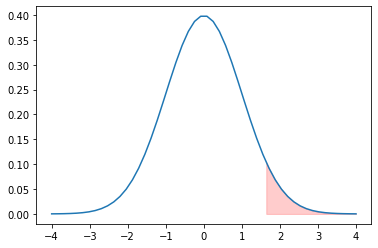

In [169]:
import matplotlib.pyplot as plt

x = np.linspace(-4, 4, 50)
plt.plot(x, stats.norm.pdf(x))
alt = np.linspace(stat, 4, 50)
plt.fill_between(alt, stats.norm.pdf(alt), color='red', alpha = 0.2)

In [170]:
print('p-value: {:.4f}'.format(1 - stats.norm.cdf(stat)))

p-value: 0.0505


## Task 7
Оцените теперь эффективность подготовительных курсов, средний балл 100 выпускников которых равен 541.5. Отвергается ли на уровне значимости 0.05 та же самая нулевая гипотеза против той же самой альтернативы? Введите достигаемый уровень значимости, округлённый до 4 знаков после десятичной точки.

In [171]:
x_mean = 541.5
stat = (x_mean - mu) / (s / np.sqrt(n))
print('p-value: {:.4f}'.format(1 - stats.norm.cdf(stat)))

p-value: 0.0495
